# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import plotly.express as px
import panel as pn
pn.extension('plotly')

import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [160]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("./Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()
#sfo_data.shape

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
#num_housing_units = sfo_data.groupby([sfo_data.index]).mean()
num_housing_units = pd.DataFrame(sfo_data['housing_units'].groupby([sfo_data.index]).mean())
num_housing_units

housing_units
year               
2010       372560.0
2011       374507.0
2012       376454.0
2013       378401.0
2014       380348.0
2015       382295.0
2016       384242.0

In [5]:
# Save the dataframe as a csv file
# YOUR CODE HERE!
num_housing_units.to_csv(r'./Data/num_housing_units.csv')

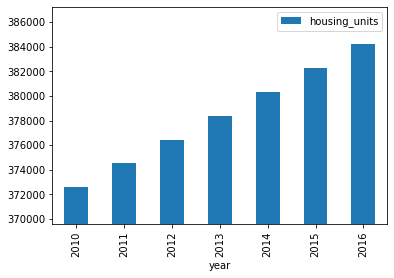

In [6]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
min = num_housing_units['housing_units'].min()
max = num_housing_units['housing_units'].max()
plot_housing_units = num_housing_units.plot.bar( y='housing_units',ylim = (min - 3000, max + 3000))

In [7]:
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart


- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [8]:
# Calculate the average sale price per square foot and average gross rent
average_per_sqft = pd.DataFrame(sfo_data['sale_price_sqr_foot'].groupby([sfo_data.index]).mean())
average_rent = pd.DataFrame(sfo_data['gross_rent'].groupby([sfo_data.index]).mean())
comb_acg_rent_per_sf = pd.concat([average_per_sqft,average_rent], axis =1, join='inner')
comb_acg_rent_per_sf.columns = ['Average_SF_Price', 'Avereage_Gross_Rent']


<AxesSubplot:xlabel='year'>

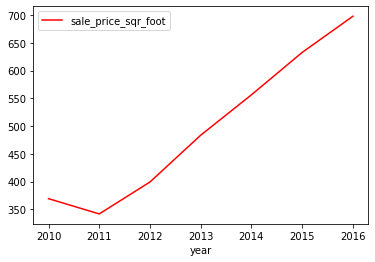

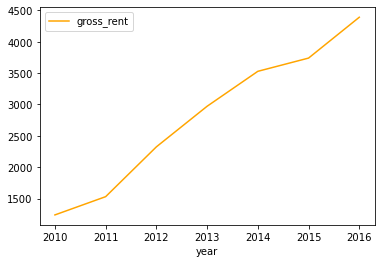

In [9]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
average_per_sqft.plot.line(color = 'RED') 

# Line chart for average montly rent
average_rent.plot.line(color = 'ORANGE') 

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [31]:
# Group by year and neighborhood and then create a new dataframe of the mean values
average_price_per_sf = sfo_data.groupby(['year','neighborhood']).mean()
average_price_per_sf

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945       372560.0      1239.0
     Anza Vista                       267.932583       372560.0      1239.0
     Bayview                          170.098665       372560.0      1239.0
     Buena Vista Park                 347.394919       372560.0      1239.0
     Central Richmond                 319.027623       372560.0      1239.0
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771       384242.0      4390.0
     Twin Peaks                       970.085470       384242.0      4390.0
     Van Ness/ Civic Center           552.602567       384242.0      4390.0
     Visitacion Valley                328.319007       384242.0      4390.0
     Westwood Park                    631.195426       384242.0      4390.0

[397 rows x 3 columns]

In [46]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
plot_avg_sale_price = average_price_per_sf.hvplot.line(
                            x='year',
                            y='sale_price_sqr_foot',
                            xlabel='Year',
                            ylabel='Average Sales Price',
                            groupby='neighborhood'
)
plot_avg_sale_price

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [33]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
plot_avg_rent = average_price_per_sf.hvplot.line(
                            x='year',
                            y='gross_rent',
                            xlabel='Year',
                            ylabel='Average Monthly Rent',
                            groupby='neighborhood'
)
plot_avg_rent

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

In [234]:
## The Top 10 Most Expensive Neighborhoods
#In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

# Getting the data from the top 10 expensive neighborhoods to own
neighborhood_avg_price_per_sf = sfo_data.groupby(['neighborhood']).mean()
#sort the average sale price per foot in descending order to get the most expensive neighborhoods
neighborhood_avg_price_per_sf = neighborhood_avg_price_per_sf.sort_values('sale_price_sqr_foot', ascending=False)
#Get the first ten rows to get plot 10 most expensive neighborhoods
ten_most_expensive_neighbohoods = neighborhood_avg_price_per_sf.head(10).reset_index()
ten_most_expensive_neighbohoods

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0  Union Square District           903.993258      377427.50  2555.166667
1         Merced Heights           788.844818      380348.00  3414.000000
2          Miraloma Park           779.810842      375967.25  2155.250000
3        Pacific Heights           689.555817      378401.00  2817.285714
4          Westwood Park           687.087575      382295.00  3959.000000
5         Telegraph Hill           676.506578      378401.00  2817.285714
6       Presidio Heights           675.350212      378401.00  2817.285714
7             Cow Hollow           665.964042      378401.00  2817.285714
8           Potrero Hill           662.013613      378401.00  2817.285714
9            South Beach           650.124479      375805.00  2099.000000

In [224]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_expensive_neighborhoods = ten_most_expensive_neighbohoods.hvplot.bar(
                                            x='neighborhood',
                                            y='sale_price_sqr_foot',
                                            xlabel='Neighborhoods',
                                            ylabel='Average sales price',
                                            title='10 Most Expensive Neighborhoods in San Francisco',
                                            height = 450,
                                            rot=45)
top_10_expensive_neighborhoods

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [241]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
plot_avg_sale_price = average_price_per_sf.hvplot.bar(
                                                        x='year', 
                                                        y=['sale_price_sqr_foot', 'gross_rent'],
                                                        groupby ='neighborhood',
                                                        xlabel='Year',
                                                        ylabel='Average Sales Price/SF vs Average Gross Renat',                                                        
                                                        title='Average Sale Price Per SF',
                                                        width=800, height=600, rot=90
                                                    ) 
plot_avg_sale_price

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

In [245]:
# Plotting the data from the top 10 expensive neighborhoods

plot_avg_sale_price_10 = ten_most_expensive_neighbohoods.hvplot.bar(
                                                        x='neighborhood', 
                                                        y='sale_price_sqr_foot', 
                                                        xlabel='Neighborhood',
                                                        ylabel='Average Sales Price Per SF',                                                        
                                                        title='Average Sale Price Per SF',
                                                        width=600, height=400, rot=45
                                                    ) 
plot_avg_sale_price_10

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [246]:
# Load neighborhoods coordinates data
location_file_path = Path("./Data/neighborhoods_coordinates.csv")
neighborhood_location_data = pd.read_csv(location_file_path)
neighborhood_location_data

Neighborhood        Lat         Lon
0         Alamo Square  37.791012 -122.402100
1           Anza Vista  37.779598 -122.443451
2              Bayview  37.734670 -122.401060
3      Bayview Heights  37.728740 -122.410980
4       Bernal Heights  37.728630 -122.443050
..                 ...        ...         ...
68         West Portal  37.740260 -122.463880
69    Western Addition  37.792980 -122.435790
70  Westwood Highlands  37.734700 -122.456854
71       Westwood Park  37.734150 -122.457000
72         Yerba Buena  37.792980 -122.396360

[73 rows x 3 columns]

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [247]:
# Calculate the mean values for each neighborhood
neighborhood_mean = sfo_data.groupby('neighborhood').mean()
neighborhood_mean.reset_index(inplace=True)
neighborhood_mean=neighborhood_mean.round(2)

In [248]:
# Join the average values with the neighborhood locations
comb_loc_mean_data = pd.concat([neighborhood_location_data,
                                neighborhood_mean['sale_price_sqr_foot'],
                                neighborhood_mean['housing_units'],
                                neighborhood_mean['gross_rent']], axis=1).dropna()
comb_loc_mean_data

Neighborhood        Lat         Lon  sale_price_sqr_foot  \
0         Alamo Square  37.791012 -122.402100               366.02   
1           Anza Vista  37.779598 -122.443451               373.38   
2              Bayview  37.734670 -122.401060               204.59   
3      Bayview Heights  37.728740 -122.410980               590.79   
4       Bernal Heights  37.728630 -122.443050               576.75   
..                 ...        ...         ...                  ...   
68         West Portal  37.740260 -122.463880               498.49   
69    Western Addition  37.792980 -122.435790               307.56   
70  Westwood Highlands  37.734700 -122.456854               533.70   
71       Westwood Park  37.734150 -122.457000               687.09   
72         Yerba Buena  37.792980 -122.396360               576.71   

    housing_units  gross_rent  
0       378401.00     2817.29  
1       379050.00     3031.83  
2       376454.00     2318.40  
3       382295.00     3739.00  
4       379374.50     3080.33  
..            ...         ...  
68      376940.75     2515.50  
69      377427.50     2555.17  
70      376454.00     2250.50  
71      382295.00     3959.00  
72      377427.50     2555.17  

[73 rows x 6 columns]

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

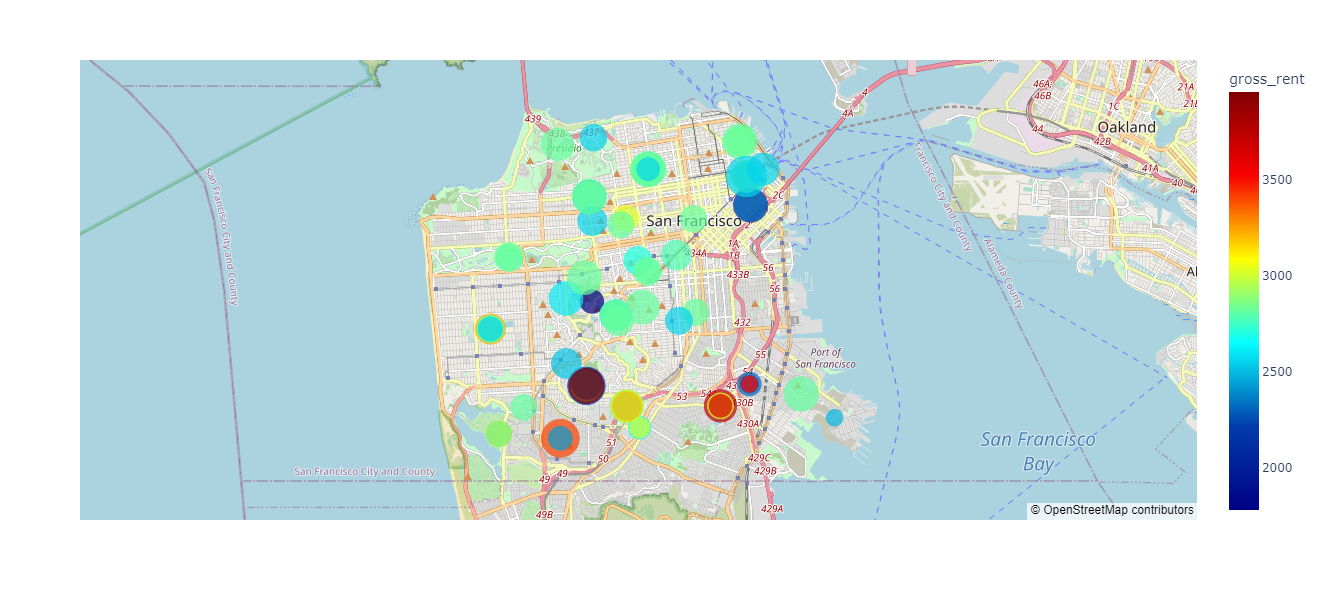

In [249]:
# Set the mapbox access token
# Plot Data
map_plot = px.scatter_mapbox(
    comb_loc_mean_data,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    hover_name="Neighborhood",
    color_continuous_scale=px.colors.sequential.Jet,
    size_max=30,
    height=600, 
    width=1200,
    mapbox_style="open-street-map",
    zoom=11
)

# Create a scatter mapbox to analyze neighborhood info
# Display the map
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [209]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

NameError: name 'df_costs' is not defined

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [ ]:
# Parallel Categories Plot
# YOUR CODE HERE!

In [ ]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [ ]:
# Sunburst Plot
# YOUR CODE HERE!